## Loading data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [2]:
# Finding % of missing values
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


## Imputation using Pandas

In [3]:
# Train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
# Finding % of missing values
X_train.isnull().mean()*100

,0
Age,19.662921
Fare,5.056180
Family,0.000000


In [5]:
# Age column
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_-1'] = X_train['Age'].fillna(-1)

# Fare column
X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_-1'] = X_train['Fare'].fillna(-1)

In [6]:
X_train.sample(10)

,Age,Fare,Family,Age_99,Age_-1,Fare_99,Fare_-1
525,40.5,7.7500,0,40.5,40.5,7.7500,7.7500
99,34.0,26.0000,1,34.0,34.0,26.0000,26.0000
410,NaN,7.8958,0,99.0,-1.0,7.8958,7.8958
760,NaN,14.5000,0,99.0,-1.0,14.5000,14.5000
592,47.0,7.2500,0,47.0,47.0,7.2500,7.2500
201,NaN,69.5500,10,99.0,-1.0,69.5500,69.5500
32,NaN,7.7500,0,99.0,-1.0,7.7500,7.7500
277,NaN,0.0000,0,99.0,-1.0,0.0000,0.0000
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
715,19.0,7.6500,0,19.0,19.0,7.6500,7.6500


In [7]:
# Variance before and after for Age
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 imputation: ', X_train['Age_-1'].var())

Original Age variable variance:  210.2517072477438
Age Variance after 99 imputation:  932.9665366701436
Age Variance after -1 imputation:  315.99550362600644


In [8]:
# Variance before and after for Fare
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 99 imputation: ', X_train['Fare_99'].var())
print('Fare Variance after -1 imputation: ', X_train['Fare_-1'].var())

Original Fare variable variance:  2761.031434948639
Fare Variance after 99 imputation:  2833.708690936757
Fare Variance after -1 imputation:  2675.2394049177087


In [9]:
# Covariance before and after imputation
X_train.cov()

,Age,Fare,Family,Age_99,Age_-1,Fare_99,Fare_-1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,75.273024,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,17.603852,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-116.528480,-101.137070
Age_-1,210.251707,135.785804,-5.034556,-166.460682,315.995504,138.114503,124.270305
Fare_99,75.273024,2761.031435,17.603852,-116.528480,138.114503,2833.708691,2514.109946
Fare_-1,69.137162,2761.031435,17.684447,-101.137070,124.270305,2514.109946,2675.239405


In [10]:
# Correlation before and after imputation
X_train.corr()

,Age,Fare,Family,Age_99,Age_-1,Fare_99,Fare_-1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.091016,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.196548,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.071667,-0.064017
Age_-1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.145956,0.135159
Fare_99,0.091016,1.000000,0.196548,-0.071667,0.145956,1.000000,0.913115
Fare_-1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.913115,1.000000


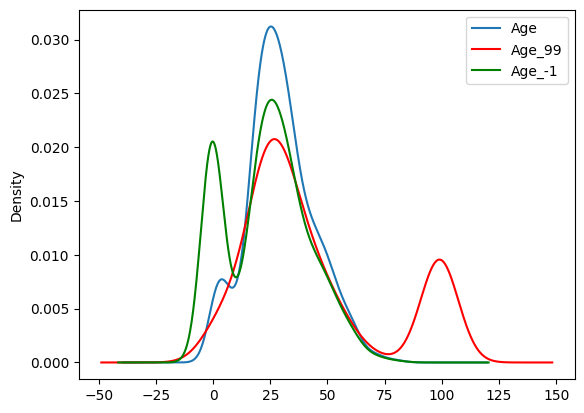

In [11]:
# Change in distribution of Age before and after imputation
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')
X_train['Age_-1'].plot(kind='kde', ax=ax, color='green')

lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, lables, loc='best')

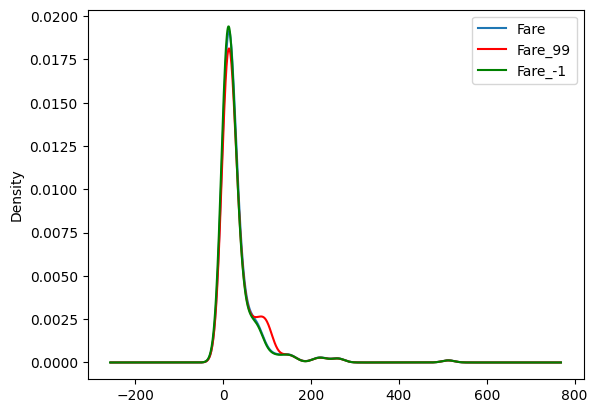

In [12]:
# Change in distribution of Fare before and after imputation
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)
X_train['Fare_99'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_-1'].plot(kind='kde', ax=ax, color='green')

lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, lables, loc='best')

<Axes: >

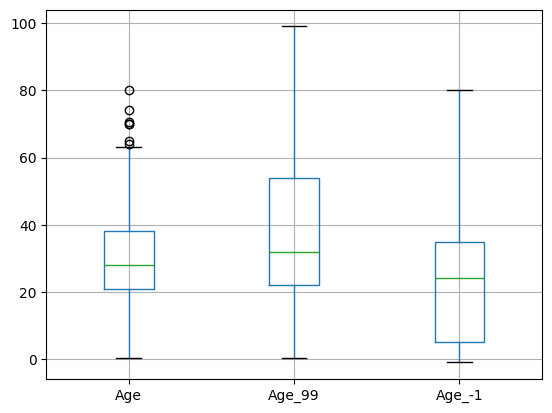

In [13]:
# Change in outliers of Age after imputation
X_train[['Age', 'Age_99', 'Age_-1']].boxplot()

<Axes: >

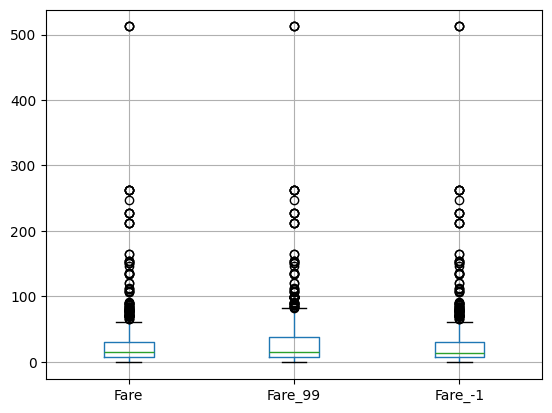

In [14]:
# Change in outliers of Fare after imputation
X_train[['Fare', 'Fare_99', 'Fare_-1']].boxplot()

## Imputation using Scikit learn

In [15]:
# Train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
# Sklearn simpleImputer
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [17]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [18]:
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [19]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [20]:
trf.named_transformers_['imputer2'].statistics_

array([999.])